# Bitcoin Price Predictor<br>LinearRegression Model

# Import Section

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

In [3]:
df = yf.download('BTC-USD', start='2017-01-01') # Downloading the dataset

[*********************100%***********************]  1 of 1 completed


## EDA

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1.668000e+03
mean,12139.815855,12490.770513,11753.491053,12160.932983,12160.932983,1.958023e+10
std,13334.756168,13759.977240,12830.700191,13345.699272,13345.699272,2.146320e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,4855.342651,4969.182495,4652.736816,4877.781006,4877.781006,4.213310e+09
50%,8141.181641,8273.189941,7911.633057,8145.025879,8145.025879,1.377914e+10
75%,11009.767578,11385.601807,10696.946045,10995.930420,10995.930420,2.860833e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [52]:
df = df.reset_index() # Reseting the index to let date be a feature

In [72]:
# Setting the feature and target variables
X = df[["High", "Low", "Open", "Volume"]].values
y = df["Close"].values

## Test, train, split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) # Test size of 20%

## Model Building

In [74]:
model = LinearRegression() # initializing the Linear regression model

In [75]:
model.fit(X_train, y_train) # fitting the data to the model

LinearRegression()

In [76]:
print(model.coef_)

[ 9.08852053e-01  6.32686315e-01 -5.47302111e-01  1.06525331e-09]


In [77]:
print(model.intercept_)

-0.2834604799609224


In [78]:
predict = model.predict(X_test) # Making model predictions using the test set

In [79]:
pdf = pd.DataFrame({'Actual':y_test, 'Predicted':predict}) # Creating a df for the predicted and actual price

In [80]:
pdf.head(10)

,Actual,Predicted
0,10085.627930,10000.044739
1,10276.793945,10239.846391
2,8621.900391,8774.965287
3,4078.599121,4231.422515
4,35862.378906,36032.200994
5,1734.449951,1737.708089
6,8869.669922,8865.306404
7,1221.380005,1214.769384
8,15178.200195,14876.484536
9,5605.509766,5593.453354


## Model Performance

In [81]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, predict))) # Actual metric that is used

Mean Absolute Error 156.98013450732333
Mean Squared Error 124301.35316302953
Root Mean Squared Error 352.563970313232


In [82]:
graph = pdf.head(20)

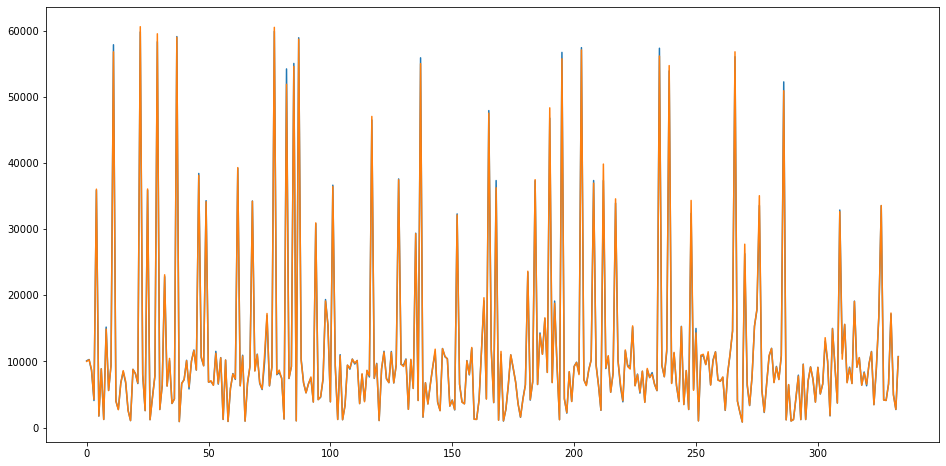

In [84]:
# Graphing the results of the model
plt.figure(1, figsize=(16,8))
plt.plot(pdf.values)